In [1]:
from scipy.io import loadmat
from scipy.io import savemat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

import random
from tqdm import tqdm

import math

%load_ext autoreload

In [2]:
%autoreload 2
from classes.fpst import *

In [3]:
if "google.colab" in sys.modules:
    root_dir = os.path.join(
        os.getcwd(), "drive", "MyDrive", "Colab Notebooks"
    )
    data_dir = os.path.join(root_dir, "data")
else:
    root_dir = os.getcwd()
    data_dir = os.path.join(root_dir, "data")

dir = os.path.join(data_dir, "SPST_perfect")

In [6]:
def get_spst(x, y, len_map, fpsts):
    spst = np.zeros((len_map, len_map))
    ind = 0
    len_map2 = len(fpsts[0])
    for i in range(len_map):
        for j in range(len_map):
            ''' fpst = fpsts[ind]
            fpst = fpst[::-1]
            fpst = fpst.T '''
            spst[i][j] = fpsts[ind][len_map2 - y - 1][x]
            ind += 1
    return spst

In [5]:
len_map = 64
len_map_big = 512

path = os.path.join(data_dir, "interpol_64", "Maps_3MI" + str(2) + "_" + str(-60))
maps, coords = load_data(path, len_map_big)

Load: 100%|██████████| 4096/4096 [01:18<00:00, 52.10task/s]


In [7]:
dir_path = os.path.join(data_dir, "interpol_64", "FPST_3MI2_-60")
total_tasks = (512 * 512)

fpsts_64, coords_64 = load_FPST(dir_path, total_tasks)

Overhead done, starting the loop


Process: 100%|██████████| 262144/262144 [06:28<00:00, 674.03task/s] 


0.0


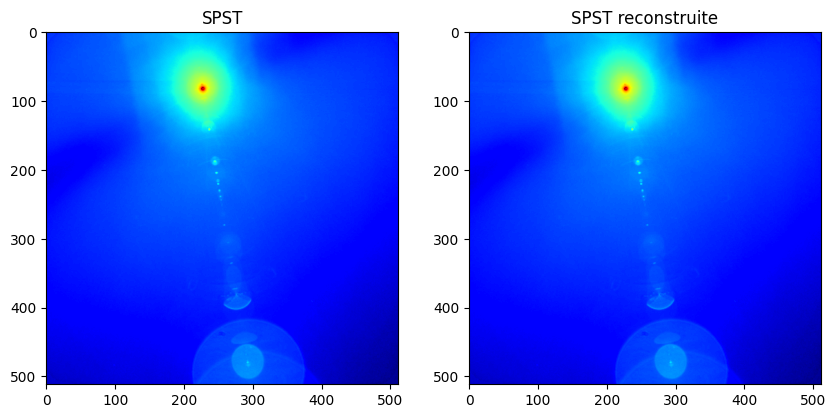

In [11]:
ind = random.randint(0, len(maps))

len_map = 64
len_map_big = 512

stride = math.ceil(len_map_big / len_map)

x = math.floor(coords[ind][0] / stride)
y = math.floor(coords[ind][1] / stride)

spst = maps[ind]
spst_rec = get_spst(x, y, len_map_big, fpsts_64)

print(np.mean(spst - spst_rec))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.log10(np.abs(spst)), cmap="jet")
axs[0].set_title("SPST")
axs[1].imshow(np.log10(np.abs(spst_rec)), cmap="jet")
axs[1].set_title("SPST reconstruite")
plt.show()

In [ ]:
file = loadmat(os.path.join(dir, "SPSTdata_2_pol-60.mat"))

maps = file["AcombineAll"][0]
X = file["Xnom_dumARRAY"][0]
Y = file["Ynom_dumARRAY"][0]

In [ ]:
file = loadmat(os.path.join(dir, "FPSTdata_2_pol-60.mat"))

fpsts_26 = file["fpsts"]
forbiden = file["forbiden"][0]
coords_26 = file["coords"]

In [ ]:
ind = random.randint(0, len(maps))

len_map = 26
len_map_big = 512

stride = math.ceil(len_map_big / len_map)

x = math.floor(X[ind] / stride)
y = math.floor(Y[ind] / stride)

spst = maps[ind]
spst_rec = get_spst(x, y, len_map_big, fpsts_26)

print(np.mean(spst - spst_rec))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.log10(np.abs(spst)), cmap="jet")
axs[0].set_title("SPST")
axs[1].imshow(np.log10(np.abs(spst_rec)), cmap="jet")
axs[1].set_title("SPST reconstruite")
plt.show()